# RGB Inversion
# Authors: Sam Foucart, Jack Mullen
Program reads in csv containing iPhone SE spectral sensitivity, then plots it, and performs RGB inversion on a DNG photo taken by an iPhone 7+

In [97]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import cv2

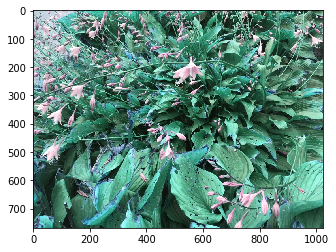

In [98]:
img = cv2.imread('plant.DNG')
plt.imshow(img)

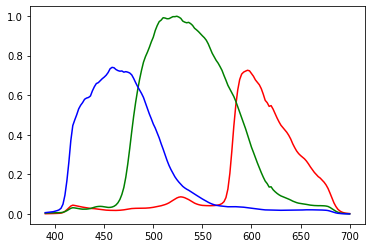

In [99]:
spectral_response_frame = pd.read_csv('iPhone_SE_spectral_response.csv')
fig = plt.plot(spectral_response_frame['# Wavelength'], spectral_response_frame[' R'], 'r')
fig = plt.plot(spectral_response_frame['# Wavelength'], spectral_response_frame[' G'], 'g')
fig = plt.plot(spectral_response_frame['# Wavelength'], spectral_response_frame[' B'], 'b')
plt.show()


In [100]:
C_R = spectral_response_frame[' R'].to_numpy()
C_B = spectral_response_frame[' B'].to_numpy()
C_G = spectral_response_frame[' G'].to_numpy()
C = np.row_stack((C_R, C_B, C_G))
C_dagger = np.matmul(np.transpose(C), np.linalg.inv(np.matmul(C, np.transpose(C))))

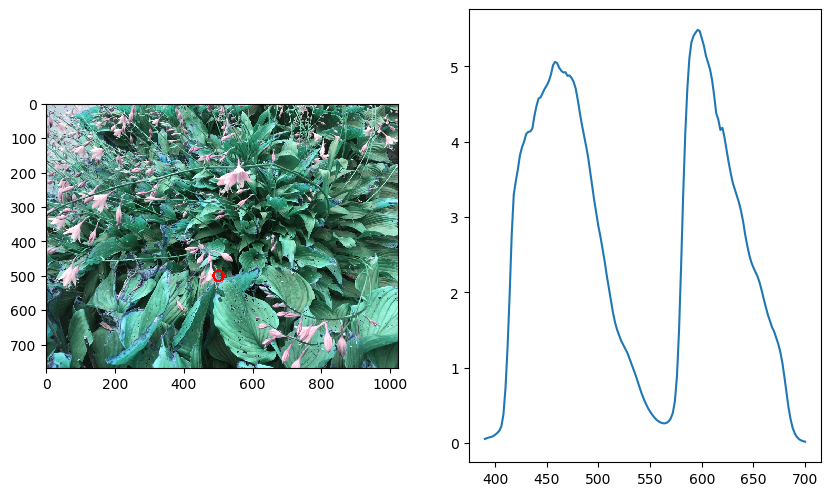

In [101]:
plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')

plt.subplot(1, 2, 1)
plt.imshow(cv2.circle(img, (500, 500), 15, (255, 0, 0), 5))

plt.subplot(1, 2, 2)
R = np.matmul(C_dagger, img[500, 500])
plt.plot(spectral_response_frame['# Wavelength'], R)
plt.show()

In [ ]:
plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')

plt.subplot(1, 2, 1)
plt.imshow(cv2.circle(img, (500, 500), 15, (255, 0, 0), 5))

plt.subplot(1, 2, 2)
R = np.matmul(C_dagger, img[500, 500])
plt.plot(spectral_response_frame['# Wavelength'], R)
plt.show()